# **Campus Management**
#### **Group Members:** : *Devanshi, Aneesh, Kosi*
---

In [21]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.feature_selection import SelectKBest, f_classif
import warnings
warnings.filterwarnings('ignore')


### Importing the dataset

In [22]:
train_data = pd.read_csv('../2/Train_Data.csv')
test_data = pd.read_csv('../2/Test_Data.csv')

In [23]:
train_data.head(10)

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,etest_p,mba_p,specialisation,workex,status
0,M,73.976975,Central,77.392691,Others,Science,73.623151,Sci&Tech,84.498310,67.207006,Mkt&HR,Yes,Placed
1,M,62.000000,Others,62.000000,Others,Commerce,60.000000,Comm&Mgmt,63.000000,52.380000,Mkt&HR,Yes,Placed
2,M,80.965242,Others,67.104275,Others,Science,72.482621,Sci&Tech,91.343588,71.392313,Mkt&Fin,No,Placed
3,M,52.000000,Others,65.000000,Others,Arts,57.000000,Others,75.000000,59.810000,Mkt&Fin,Yes,Not Placed
4,F,69.000000,Central,62.000000,Central,Science,66.000000,Sci&Tech,75.000000,67.990000,Mkt&HR,No,Not Placed
5,M,78.762370,Others,78.663054,Others,Commerce,70.281069,Comm&Mgmt,67.441772,65.318049,Mkt&Fin,Yes,Placed
6,M,51.794497,Others,40.985605,Others,Science,62.126648,Others,65.862469,52.249751,Mkt&HR,No,Not Placed
7,M,59.805924,Central,61.451481,Others,Commerce,60.000000,Comm&Mgmt,62.451481,57.025957,Mkt&HR,Yes,Placed
8,M,77.351318,Central,74.834674,Others,Science,73.487712,Sci&Tech,80.123994,68.001657,Mkt&HR,Yes,Placed
9,M,76.500000,Others,97.700000,Others,Science,78.860000,Sci&Tech,97.400000,74.010000,Mkt&Fin,No,Placed


In [24]:
test_data.head(10)

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,etest_p,mba_p,degree_t,workex,specialisation
0,M,73.163372,Central,68.535901,Central,Science,71.581686,58.954215,58.235587,Comm&Mgmt,Yes,Mkt&Fin
1,M,74.000000,Central,70.000000,Central,Science,72.000000,60.000000,57.240000,Comm&Mgmt,Yes,Mkt&Fin
2,M,85.613691,Central,61.718334,Others,Science,70.962963,59.590873,60.635396,Sci&Tech,Yes,Mkt&HR
3,M,77.909979,Others,81.549151,Others,Science,69.847510,85.178574,64.304440,Sci&Tech,Yes,Mkt&Fin
4,M,80.851350,Others,66.168927,Others,Science,67.743252,87.851350,68.660478,Sci&Tech,Yes,Mkt&Fin
5,F,64.417844,Central,69.139281,Central,Science,63.622850,85.762131,69.868454,Others,Yes,Mkt&HR
6,M,81.009686,Others,65.456412,Others,Science,66.951569,88.009686,68.217927,Sci&Tech,Yes,Mkt&Fin
7,F,73.898891,Central,61.680011,Central,Science,62.832852,76.152163,64.435469,Others,Yes,Mkt&HR
8,F,69.169903,Central,71.103329,Central,Arts,65.742503,65.859917,62.310853,Others,Yes,Mkt&HR
9,M,56.053489,Central,70.586035,Others,Commerce,65.271677,53.134415,72.319005,Comm&Mgmt,Yes,Mkt&Fin


### Visualizations

Looking into class imbalance:

In [25]:
print(pd.value_counts(train_data['status']))

status
Placed        439
Not Placed    231
Name: count, dtype: int64


Text(0, 0.5, 'Count')

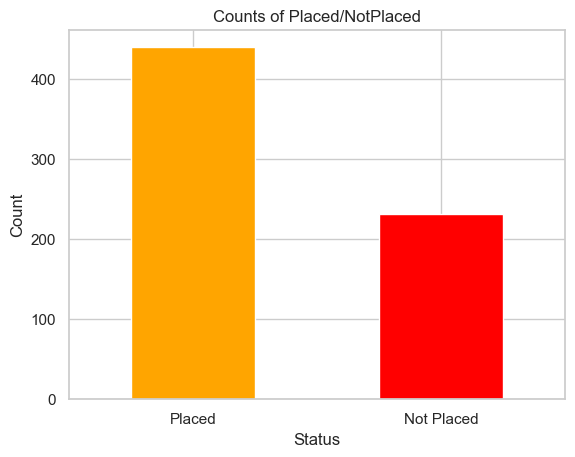

In [26]:
LABELS = ["Placed", "Not Placed"]
class_counts = pd.value_counts(train_data['status'], sort = True)
class_counts.plot(kind = 'bar', rot=0, color=['orange','red']) 
plt.title('Counts of Placed/NotPlaced')
plt.xticks(range(2), LABELS)
plt.xlabel("Status")
plt.ylabel("Count")

There are 439 instances of "Placed" and 231 instances of "Not Placed," according to the status variable's distribution. This suggests that the number of "Placed" instances is nearly twice that of "Not Placed" cases. Although there is an imbalance here, it is not a severe one. Because of its moderate degree of imbalance, extensive resampling approaches might not be necessary.

### Distribution of categories based on the target variable

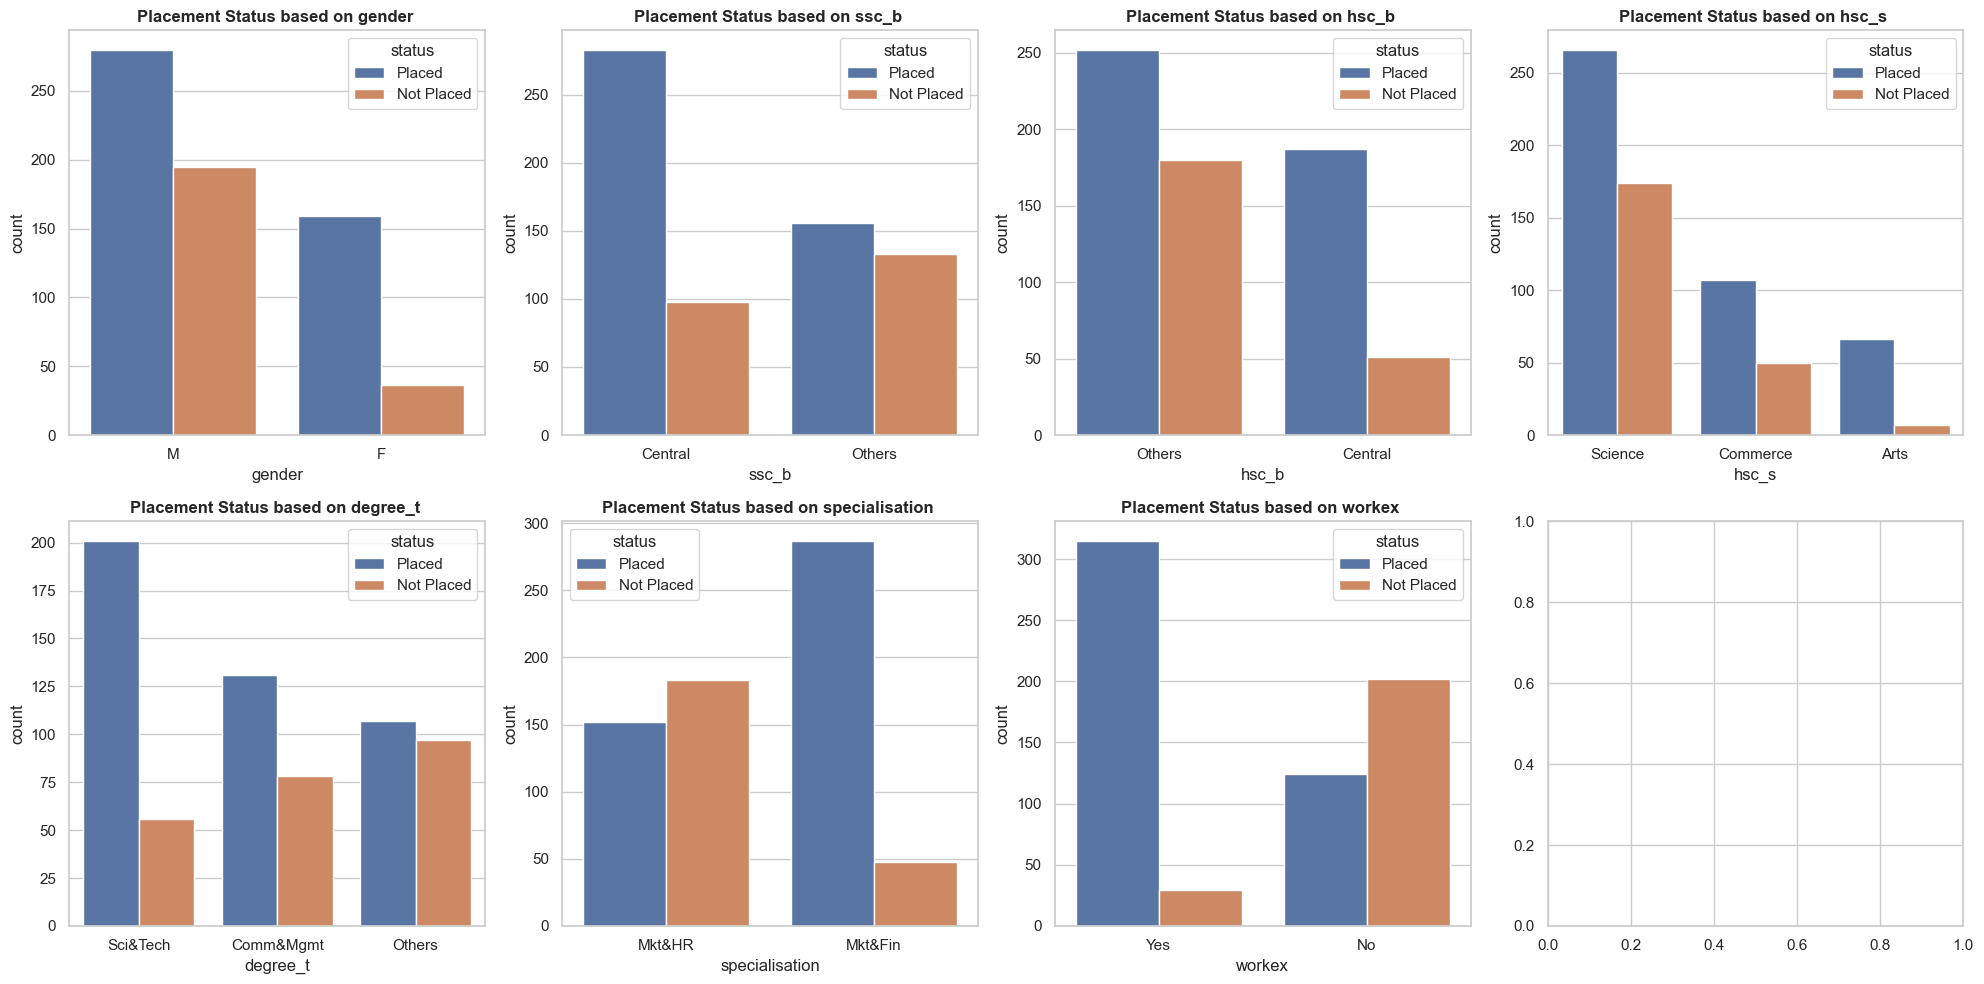

In [27]:
categorical_features = ['gender', 'ssc_b', 'hsc_b', 'hsc_s', 'degree_t', 'specialisation', 'workex']


fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))
axes = axes.flatten()

for i, feature in enumerate(categorical_features):
    sb.countplot(x=feature, hue='status', data=train_data,  ax=axes[i])
    # sb.lineplot(x=train_data.index, y=feature, data=train_data, ax=axes[i])
    axes[i].set_title(f'Placement Status based on {feature} ',fontweight='bold')

plt.tight_layout()
plt.show()

Based on the bar plots:
- According to **SSC Board placement status (ssc_b)**, Central Board students appear to be placed more frequently than "Others" category students.
- According to **HSC Board placement(hsc_b)**, Central board students are placed at a higher rate than "Others," much like SSC Board students are.
- The Science **stream** has the greatest placement rate, followed by the Commerce stream, while the Arts stream has the lowest.
- **Degree Type (degree_t)** Placement Status: Students in the Science & Tech field are best placed, followed by those in the Communication & Management field, while "Others" have the lowest placements.
- Placement Status according to **Specialisation**: Students with a concentration in Mkt&Fin, appear to be placed more frequently than those with a concentration in Mkt&HR.
- **Work Experience**-Based Placement Status (workex): Students who report having work experience (Yes) are placed more frequently than those who report having none (No).

### **Preprocessing**

#### Missing Values

In [28]:
train_data.isnull().sum()

gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
etest_p           0
mba_p             0
specialisation    0
workex            0
status            0
dtype: int64

> ### *No Null values, so no need to process this data*

#### Outlier Detection

In [29]:
train_data.describe()

,ssc_p,hsc_p,degree_p,etest_p,mba_p
count,670.000000,670.000000,670.000000,670.000000,670.000000
mean,68.960017,65.203006,65.229034,73.740025,62.993108
std,10.182563,11.222577,7.157608,12.101840,5.126855
min,42.864579,37.106246,50.000000,50.000000,51.290000
25%,61.619318,60.431420,60.000000,64.199327,59.431996
50%,68.332563,64.753270,64.906329,72.677821,62.481656
75%,77.130019,71.390402,70.271632,83.955186,66.864202
max,89.400000,97.700000,91.000000,97.938047,77.890000


The maximum value of the all the features seems to be in a reasonable range. 

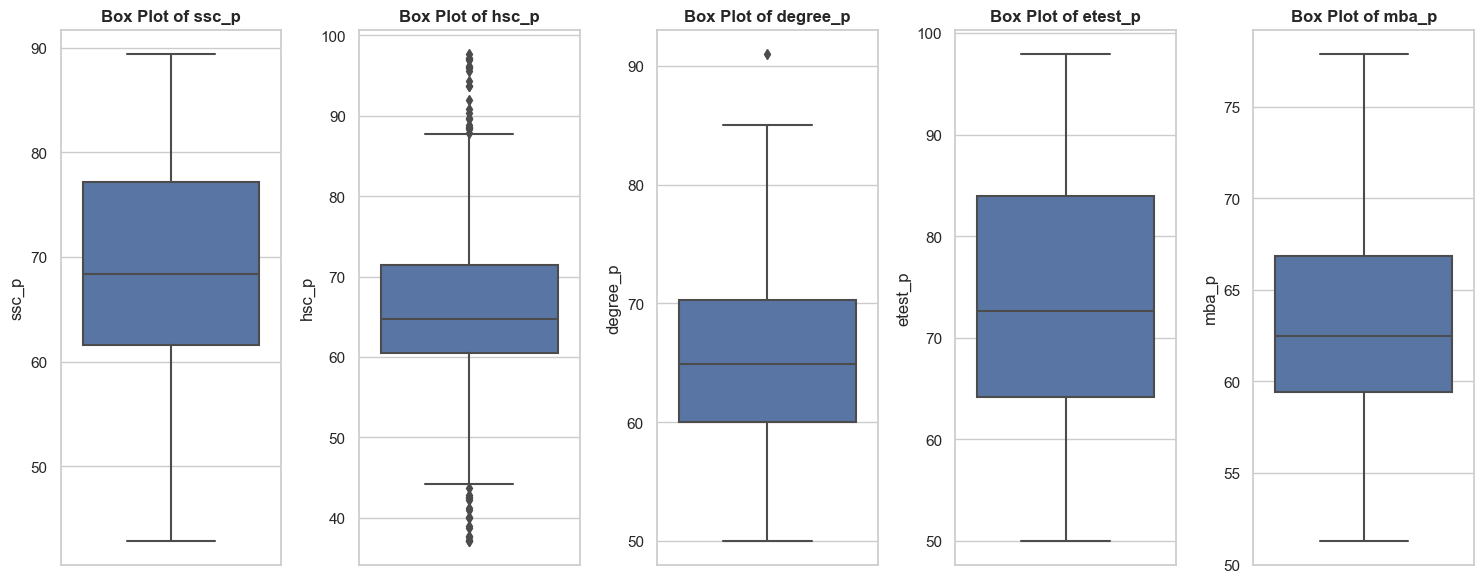

In [30]:
numerical_columns = train_data.select_dtypes(include=['float64', 'int64']).columns

num_cols = 5
num_rows = (len(numerical_columns) + num_cols - 1) // num_cols
num_rows = 1 
plt.figure(figsize=(15, num_rows * 6))
sb.set(style="whitegrid") 

for i, column in enumerate(numerical_columns, 1):
    plt.subplot(num_rows, num_cols, i)
    sb.boxplot(y=train_data[column])
    plt.title(f'Box Plot of {column}',fontweight='bold')

plt.tight_layout()
plt.show()

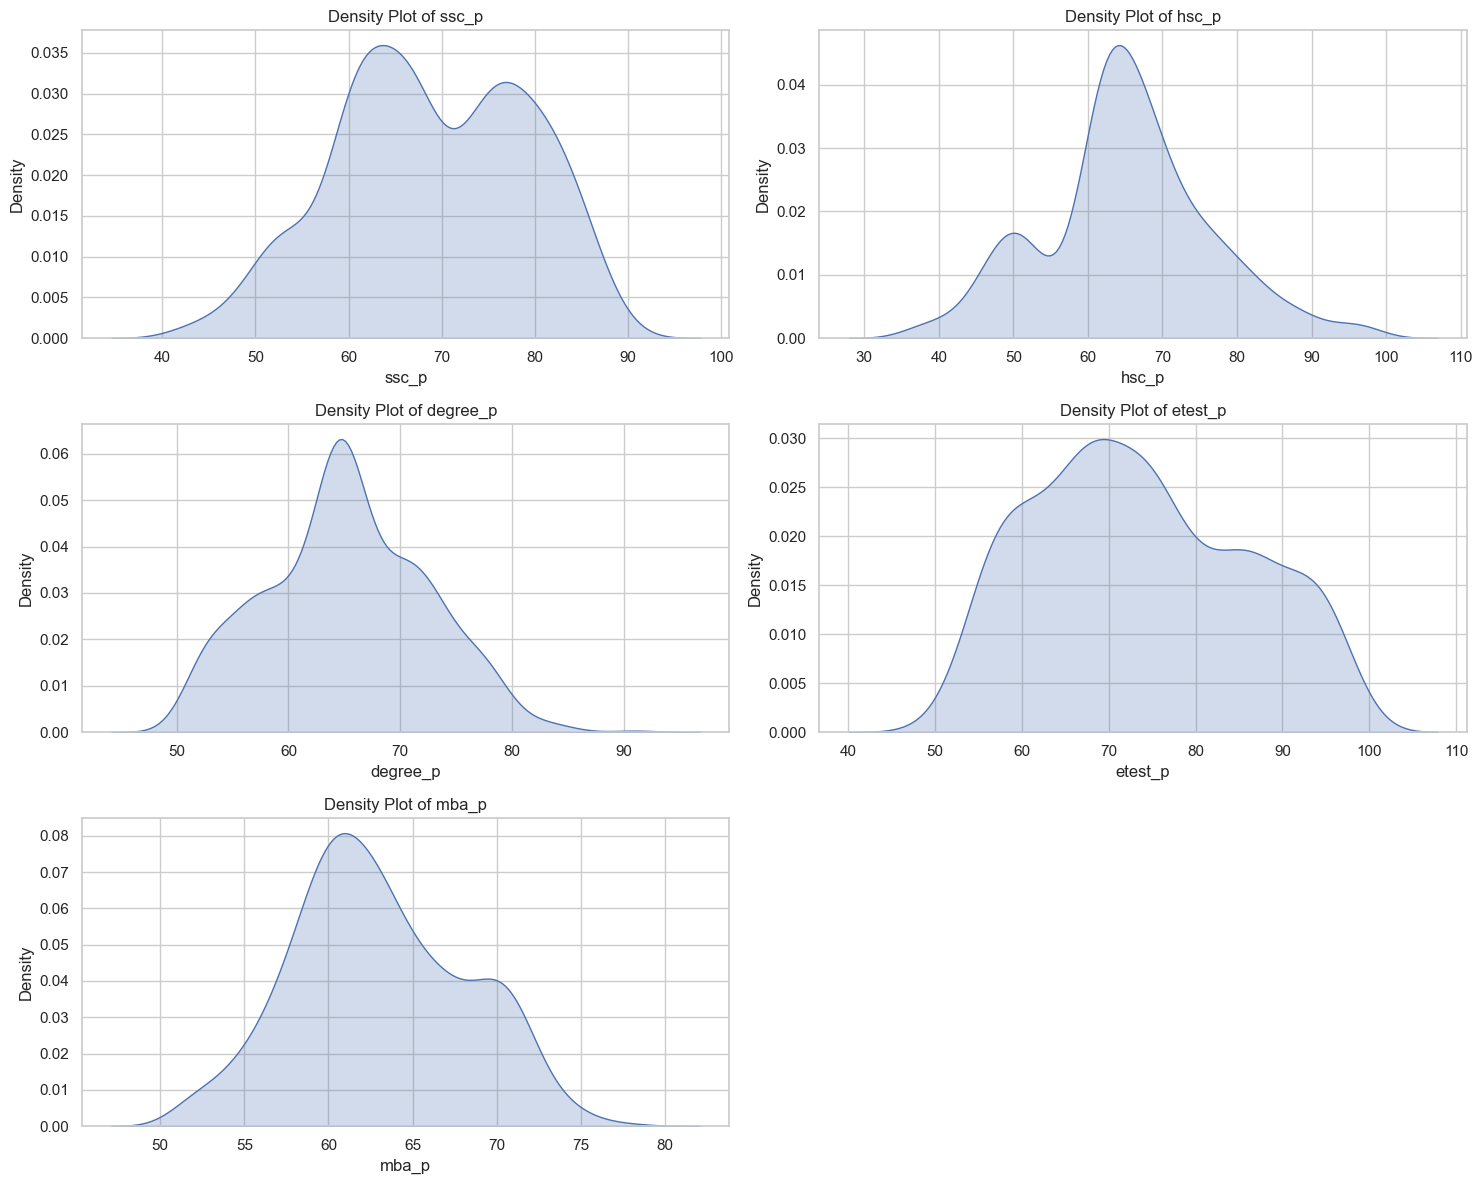

In [31]:
import seaborn as sns
numeric_cols = train_data.select_dtypes(include=['float64', 'int64'])
n_rows = (len(numerical_columns) + 1) // 2
fig, axs = plt.subplots(n_rows, 2, figsize=(15, 4 * n_rows))
axs = axs.flatten()

for i, col in enumerate(numerical_columns):
    sns.kdeplot(train_data[col], ax=axs[i], fill=True)
    axs[i].set_title(f'Density Plot of {col}')
    axs[i].set_xlabel(col)
    axs[i].set_ylabel('Density')

if len(numerical_columns) % 2 != 0:
    axs[-1].axis('off')

plt.tight_layout()
plt.show()


Based on the density plots and box plots, there is no apparent skewness in any of the numerical columns. The distributions appear to be somewhat close to normalized.

### **Outlier removal**

Based on the boxplot of the feature hsc_p there seems to be the presence of some outliers. Based on the statistical measures the outliers do not seem to skew the distribution but may cause an issue during model training.

In [32]:
Q1 = train_data['hsc_p'].quantile(0.25)
Q3 = train_data['hsc_p'].quantile(0.75)
IQR = Q3 - Q1

lower_whisker = Q1 - 1.5 * IQR
upper_whisker = Q3 + 1.5 * IQR

df_cleaned = train_data[(train_data['hsc_p'] >= lower_whisker) & (train_data['hsc_p'] <= upper_whisker)]


In [33]:
df_cleaned.head(10)

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,etest_p,mba_p,specialisation,workex,status
0,M,73.976975,Central,77.392691,Others,Science,73.623151,Sci&Tech,84.498310,67.207006,Mkt&HR,Yes,Placed
1,M,62.000000,Others,62.000000,Others,Commerce,60.000000,Comm&Mgmt,63.000000,52.380000,Mkt&HR,Yes,Placed
2,M,80.965242,Others,67.104275,Others,Science,72.482621,Sci&Tech,91.343588,71.392313,Mkt&Fin,No,Placed
3,M,52.000000,Others,65.000000,Others,Arts,57.000000,Others,75.000000,59.810000,Mkt&Fin,Yes,Not Placed
4,F,69.000000,Central,62.000000,Central,Science,66.000000,Sci&Tech,75.000000,67.990000,Mkt&HR,No,Not Placed
5,M,78.762370,Others,78.663054,Others,Commerce,70.281069,Comm&Mgmt,67.441772,65.318049,Mkt&Fin,Yes,Placed
7,M,59.805924,Central,61.451481,Others,Commerce,60.000000,Comm&Mgmt,62.451481,57.025957,Mkt&HR,Yes,Placed
8,M,77.351318,Central,74.834674,Others,Science,73.487712,Sci&Tech,80.123994,68.001657,Mkt&HR,Yes,Placed
10,M,60.961359,Others,49.382702,Others,Science,54.503538,Others,70.376801,61.726117,Mkt&HR,No,Not Placed
11,F,73.809211,Central,81.213816,Central,Arts,58.657928,Others,59.233553,63.180197,Mkt&HR,Yes,Placed


### *Removed 37 records after removing outliers from the data*

In [34]:
df_cleaned['status'] = df_cleaned['status'].replace({'Placed':1, 'Not Placed':0})

In [40]:
value_counts = df_cleaned['status'].value_counts()
value_counts

status
1    418
0    215
Name: count, dtype: int64

### **One hot encoding**
One-hot encoding is appropriate for nominal variables (without inherent ordering), like gender, ssc_b, hsc_b, hsc_s, specialisation, and workex, since it does not impose ordinality that does not exist.

#### *Performing One hot encoding to covert categorical data to numerical*

In [35]:
df_encoded = pd.get_dummies(df_cleaned)
df_encoded = df_encoded.astype(int)

In [36]:
df_encoded.head(10)

,ssc_p,hsc_p,degree_p,etest_p,mba_p,status,gender_F,gender_M,ssc_b_Central,ssc_b_Others,...,hsc_s_Arts,hsc_s_Commerce,hsc_s_Science,degree_t_Comm&Mgmt,degree_t_Others,degree_t_Sci&Tech,specialisation_Mkt&Fin,specialisation_Mkt&HR,workex_No,workex_Yes
0,73,77,73,84,67,1,0,1,1,0,...,0,0,1,0,0,1,0,1,0,1
1,62,62,60,63,52,1,0,1,0,1,...,0,1,0,1,0,0,0,1,0,1
2,80,67,72,91,71,1,0,1,0,1,...,0,0,1,0,0,1,1,0,1,0
3,52,65,57,75,59,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,1
4,69,62,66,75,67,0,1,0,1,0,...,0,0,1,0,0,1,0,1,1,0
5,78,78,70,67,65,1,0,1,0,1,...,0,1,0,1,0,0,1,0,0,1
7,59,61,60,62,57,1,0,1,1,0,...,0,1,0,1,0,0,0,1,0,1
8,77,74,73,80,68,1,0,1,1,0,...,0,0,1,0,0,1,0,1,0,1
10,60,49,54,70,61,0,0,1,0,1,...,0,0,1,0,1,0,0,1,1,0
11,73,81,58,59,63,1,1,0,1,0,...,1,0,0,0,1,0,0,1,0,1


#### Analyzing the correlations between the variables

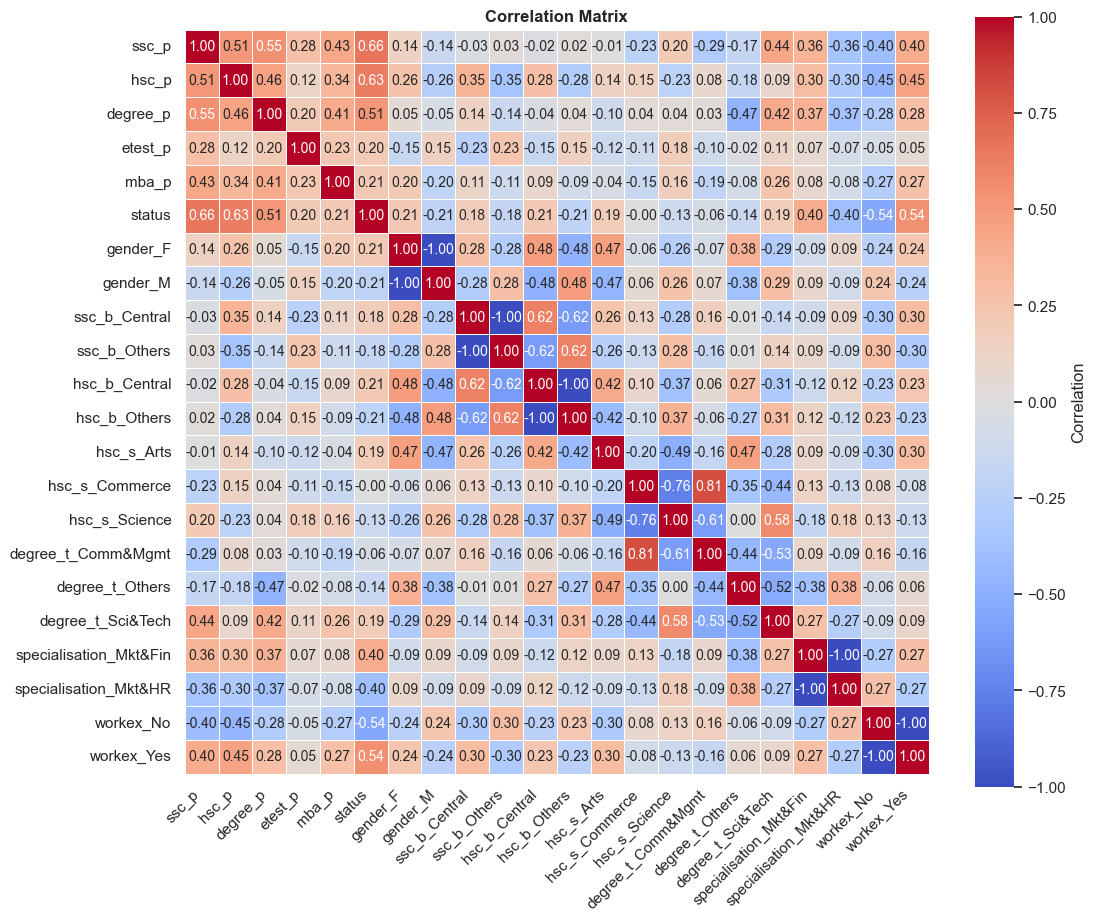

In [37]:
correlation_matrix = df_encoded.corr()

plt.figure(figsize=(12, 10))
sb.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, xticklabels=correlation_matrix.columns, yticklabels=correlation_matrix.columns, cbar_kws={'label': 'Correlation'}, annot_kws={'size': 10}, square=True)
plt.xticks(rotation=45, ha='right') 
plt.yticks(rotation=0) 
plt.title('Correlation Matrix',fontweight='bold')
plt.show()

## **Observations** - Most correlation with whether someone gets placed or not

In [38]:
correlation5 = correlation_matrix['status'].abs().sort_values(ascending=False).head(8)[1:]
print(correlation5)


ssc_p                     0.662810
hsc_p                     0.631982
workex_No                 0.543169
workex_Yes                0.543169
degree_p                  0.509716
specialisation_Mkt&HR     0.395718
specialisation_Mkt&Fin    0.395718
Name: status, dtype: float64


> #### *The top 5 correlated features to students placed are - ssc_p, hsc_p, workex, degree, specialization*